In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import config
import pandas as pd

df = pd.read_csv("/home/mwanikii/Documents/TanzaniaDataset/Input/Train.csv")
print(df.head(10))
print(df.dtypes)

df.skew().sort_values(ascending=False)
#sns.pairplot(df)


           Tour_ID                   country age_group  \
0  tour_id1hffseyw                     ITALY     45-64   
1  tour_idnacd7zag            UNITED KINGDOM     25-44   
2  tour_id62vz7e71  UNITED STATES OF AMERICA       65+   
3  tour_idrc76tzix                    RWANDA     25-44   
4  tour_idn723m0n9  UNITED STATES OF AMERICA     45-64   
5  tour_id8aylf7ba                    FRANCE     25-44   
6  tour_idvcadicba                SWIZERLAND     25-44   
7  tour_idfmavssxv                   NIGERIA     25-44   
8  tour_id8oqlvjwr            UNITED KINGDOM     18-24   
9  tour_idy0blevrs                 AUSTRALIA     45-64   

                travel_with  total_female  total_male  \
0             With Children           0.0         2.0   
1               With Spouse           1.0         1.0   
2               With Spouse           1.0         1.0   
3  With Spouse and Children           3.0         1.0   
4                     Alone           0.0         1.0   
5               Wit

total_male        14.625647
night_zanzibar    11.165929
night_mainland     9.160400
total_female       8.430881
dtype: float64

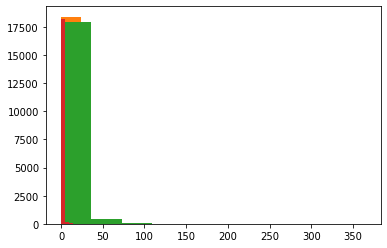

In [93]:
#Checking histogram of most skewed data
plt.hist(df["total_male"])
plt.hist(df["night_zanzibar"])
plt.hist(df["night_mainland"])
plt.hist(df["total_female"])
plt.show()

In [94]:
#Performing log transforms to reduce skew
import numpy as np
from scipy import stats
#sqrt
male_sqrt = np.sqrt(df["total_male"])
male_sqrt.skew()
#plt.hist(male_sqrt)
#sns.displot(male_sqrt)



0.14186352925134543

In [52]:
#Log transformation
df["total_male"] = df["total_male"] + 1
male_log = np.log(df["total_male"])
male_log.skew()
#sns.displot(male_log)

1.139536098359586

In [96]:
#Log Transformation for Total_female
df["total_female"] = df["total_female"] + 1
female_log = np.log(df["total_female"])
female_log.skew()

0.5144296396317806

In [95]:
#Log transformation of night_ZANZIBAR
df["night_zanzibar"] = df["night_zanzibar"] + 1
zanzibar_log = np.log(df["night_zanzibar"])
zanzibar_log.skew()

0.856760452899993

In [56]:
#Attempt at mutiple log transforms
for column in df.columns:
    try:
        df[column] = np.log(df[column])
    except (ValueError, AttributeError):
        pass


TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

(array([6.149e+03, 1.700e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

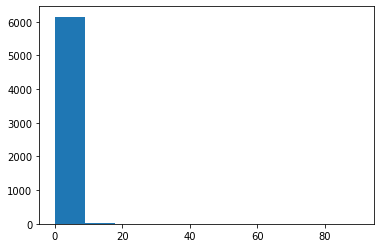

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
df_test = pd.read_csv("/home/mwanikii/Documents/TanzaniaDataset/Input/Test.csv")
df_test.head()
#df_test["total_male"].max()
plt.hist(df_test["total_male"])
#plt.show()

In [87]:
df=pd.read_csv("/home/mwanikii/Documents/TanzaniaDataset/Input/preprocessed_train_data.csv")
df["total_male"].skew()
#df["total_male"] = df["total_male"] + 1
male_log = np.log(df["total_male"])
print(df["total_male"])
print(male_log)
male_log.skew()
#df["total_male"].head()


0        0.033902
1        0.017094
2        0.017094
3        0.017094
4        0.017094
           ...   
18501    0.017094
18502    0.000000
18503    0.017094
18504    0.017094
18505    0.017094
Name: total_male, Length: 18506, dtype: float64
0       -3.384294
1       -4.069002
2       -4.069002
3       -4.069002
4       -4.069002
           ...   
18501   -4.069002
18502        -inf
18503   -4.069002
18504   -4.069002
18505   -4.069002
Name: total_male, Length: 18506, dtype: float64


/home/mwanikii/.local/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

-0.04005150148014605